# Initial EDA for possible OCEAN - Attrition prediction Model
This is the first notebook of my OCEAN - Attrition prediction Model notebook for the #66Days of Data challenge, Round 2.
In this notebook I will simply open up the CSV data files into DataFrames and do some initial exploration to get familiar with the data and figure out next steps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### Opening the dataset
Of all 3 datasets aquired, I chose this one for ease of use since it is very well organized already. Please to take into account this is not a common thing to find. It also has some interesting aditional data.

In [3]:
df1 = pd.read_csv('DATA/big-five-data-master/big_five_scores.csv')
df1.head()

,case_id,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
0,1,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
1,3,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
2,4,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
3,5,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
4,6,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


### Information Available
From an initial look above, the information available is:<br>
case_id: A unique indicator of the taker of the test. We will get rid of this since it is irrelevant tous.<br>
country: where the person is from. Interesting.<br>
age: the age of the person. Also interesting.<br>
sex: the physical sex of the person, 1 = Man, 2 = Woman. Again, also interesting.<br>
agreeable_score: normalized score (0-1) of the agreableness trait.<br>
extraversion_score 	: normalized score (0-1) of the extraversion trait.<br>
openness_score: normalized score (0-1) of the openness trait.<br>
conscientiousness_score: normalized score (0-1) of the conscientiousness trait.<br>
neuroticism_score: normalized score (0-1) of the neuroticism trait.

In [4]:
#lets get rid of the case_id Column
del df1['case_id']
df1.head()

,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
0,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
1,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
2,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
3,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
4,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


To make our work easier, let us rename the columns, with the name of the OCEAN trait.

In [6]:
df1.columns = ['country', 'age', 'sex', 'agreeableness', 'extraversion', 'openness', 'conscientiousness', 'neuroticism']
df1.head()

,country,age,sex,agreeableness,extraversion,openness,conscientiousness,neuroticism
0,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
1,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
2,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
3,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
4,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


In [7]:
df1.describe()

,age,sex,agreeableness,extraversion,openness,conscientiousness,neuroticism
count,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000
mean,25.192937,1.602477,0.696807,0.672329,0.733941,0.701998,0.574399
std,10.000932,0.489387,0.093562,0.108680,0.087609,0.107378,0.125749
min,10.000000,1.000000,0.200000,0.200000,0.253333,0.206667,0.196667
25%,18.000000,1.000000,0.640000,0.600000,0.673333,0.630000,0.486667
50%,22.000000,2.000000,0.703333,0.680000,0.736667,0.706667,0.570000
75%,29.000000,2.000000,0.763333,0.750000,0.796667,0.776667,0.660000
max,99.000000,2.000000,1.000000,0.993333,0.996667,1.000000,0.996667


In [8]:
df1.corr()

,age,sex,agreeableness,extraversion,openness,conscientiousness,neuroticism
age,1.000000,-0.002110,0.170754,-0.133600,0.018875,0.265693,-0.124734
sex,-0.002110,1.000000,0.226898,0.078299,0.099388,0.044886,0.196449
agreeableness,0.170754,0.226898,1.000000,0.063388,0.160516,0.314205,-0.169137
extraversion,-0.133600,0.078299,0.063388,1.000000,0.242168,0.157196,-0.422376
openness,0.018875,0.099388,0.160516,0.242168,1.000000,-0.044204,-0.037162
conscientiousness,0.265693,0.044886,0.314205,0.157196,-0.044204,1.000000,-0.463324
neuroticism,-0.124734,0.196449,-0.169137,-0.422376,-0.037162,-0.463324,1.000000


<AxesSubplot:>

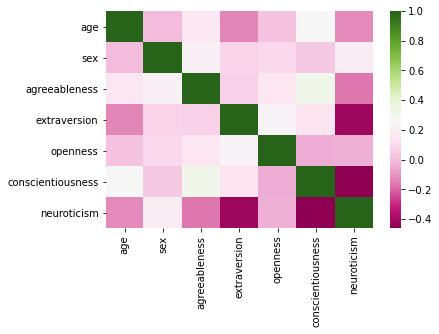

In [9]:
sns.heatmap(df1.corr(), cmap="PiYG")